# Plot overturning

CM2-025, CM2-1, OM2-025, OM2-1

In [1]:
import intake
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cmocean as cm
import cosima_cookbook as cc

In [2]:
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client

client = Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/42943/status,
Dashboard: /proxy/42943/status,Workers: 28
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46769,Workers: 28
Dashboard: /proxy/42943/status,Total threads: 28
Started: Just now,Total memory: 125.19 GiB
Comm: tcp://127.0.0.1:37131,Total threads: 1
Dashboard: /proxy/38761/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:37089,


#### Define a few things first

In [3]:
# Path to data
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'
path_to_data_cz861 = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025_cz861/'

In [4]:
# Plotting info
ft_size = 12
plt.rcParams.update({'font.size': ft_size})
fig_path = '/g/data/x77/wgh581/Figures/Figures_ACCESS_CM2/'

In [5]:
# Define colours
CLEX_Red = '#DA1E48'
CLEX_Pink = '#F48580'
CLEX_SkyBlue = '#00BDF2'
CLEX_MidBlue = '#008DD0'
CLEX_CobaldBlue = '#0066B3'
CLEX_MidnightBlue = '#113559'
CLEX_Gray = '#4D4D47'

### Import data

Calculated in `0_Calc_overturning.ipynb`

Global ocean

In [6]:
psi_CM2_025 = xr.open_dataarray(path_to_data_cz861 + 'Overturning_CM2_025_400_499_cz861.nc').mean('time')

In [7]:
psi_CM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/psi_global_CM2_1_400_499.nc').mean('time')
psi_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/psi_global_OM2_025_2300_2399.nc').mean('time')
psi_OM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/psi_global_OM2_1_2500_2599.nc').mean('time')

Atlantic basin

In [30]:
atlantic_psi_CM2_025 = xr.open_dataarray(path_to_data_cz861 + 'atlantic_psi_400_499_cz861.nc').mean('time')

In [31]:
atlantic_psi_CM2_1   = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_CM2_1/atlantic_psi_400_499_CM2_1.nc').mean('time')
atlantic_psi_OM2_025 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_025/atlantic_psi_2300_2399_OM2_025.nc').mean('time')
atlantic_psi_OM2_1   = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_1/atlantic_psi_2500_2599_OM2_1.nc').mean('time')

### Plotting

In [12]:
clev   = np.arange(-25,27,2)
yticks = np.array([1030, 1032, 1033, 1034, 1035, 1036,1036.5, 1037])
scfac  = 4  ## A power to set the stretching of the y-axis

Global ocean

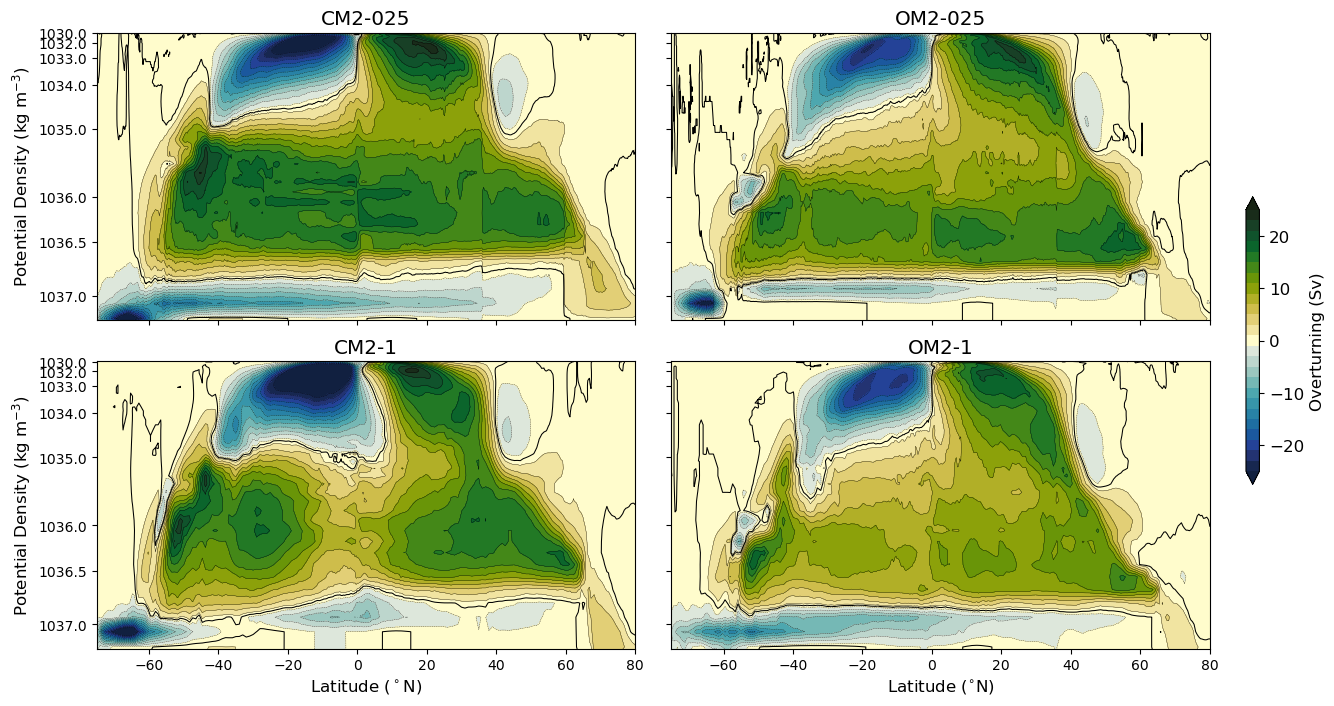

In [25]:
# fig, ax = plt.subplots(2,2, figsize=(10,8))
# ax0 = ax[0,0]
# ax1 = ax[0,1]
# ax2 = ax[1,0]
# ax3 = ax[1,1]

fig = plt.figure(figsize=(15,8))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=1, wspace=0.1)
ax0 = fig.add_subplot(gs[0:4,0])
ax1 = fig.add_subplot(gs[0:4,1])
ax2 = fig.add_subplot(gs[4:,0])
ax3 = fig.add_subplot(gs[4:,1])
                      

# CM2-025
p1 = ax0.contourf(psi_CM2_025.grid_yu_ocean,(psi_CM2_025.potrho-1028)**scfac, psi_CM2_025, cmap=cm.cm.delta, levels=clev, extend='both')
ax0.contour(psi_CM2_025.grid_yu_ocean,(psi_CM2_025.potrho-1028)**scfac, psi_CM2_025, levels=clev, colors='k', linewidths=0.25)
ax0.contour(psi_CM2_025.grid_yu_ocean,(psi_CM2_025.potrho-1028)**scfac, psi_CM2_025, levels=[0.0,], colors='k', linewidths=0.75)
ax0.set_yticks((yticks-1028)**scfac)
ax0.set_yticklabels(yticks, fontsize=ft_size-2)
ax0.set_ylim([0.5**scfac, 9.2**scfac])
ax0.invert_yaxis()
ax0.set_ylabel('Potential Density (kg m$^{-3}$)')
ax0.set_xlim([-75,80])
ax0.set_title('CM2-025')
ax0.tick_params(labelbottom=False)

# OM2-025
p1 = ax1.contourf(psi_OM2_025.grid_yu_ocean,(psi_OM2_025.potrho-1028)**scfac, psi_OM2_025, cmap=cm.cm.delta, levels=clev, extend='both')
ax1.contour(psi_OM2_025.grid_yu_ocean,(psi_OM2_025.potrho-1028)**scfac, psi_OM2_025, levels=clev, colors='k', linewidths=0.25)
ax1.contour(psi_OM2_025.grid_yu_ocean,(psi_OM2_025.potrho-1028)**scfac, psi_OM2_025, levels=[0.0,], colors='k', linewidths=0.75)
ax1.set_yticks((yticks-1028)**scfac)
ax1.set_yticklabels(yticks, fontsize=ft_size-2)
ax1.set_ylim([0.5**scfac, 9.2**scfac])
ax1.invert_yaxis()
ax1.set_xlim([-75,80])
ax1.set_title('OM2-025')
ax1.tick_params(labelbottom=False, labelleft=False)

# CM2-1
p1 = ax2.contourf(psi_CM2_1.grid_yu_ocean,(psi_CM2_1.potrho-1028)**scfac, psi_CM2_1, cmap=cm.cm.delta, levels=clev, extend='both')
ax2.contour(psi_CM2_1.grid_yu_ocean,(psi_CM2_1.potrho-1028)**scfac, psi_CM2_1, levels=clev, colors='k', linewidths=0.25)
ax2.contour(psi_CM2_1.grid_yu_ocean,(psi_CM2_1.potrho-1028)**scfac, psi_CM2_1, levels=[0.0,], colors='k', linewidths=0.75)
ax2.set_yticks((yticks-1028)**scfac)
ax2.set_yticklabels(yticks, fontsize=ft_size-2)
ax2.set_ylim([0.5**scfac, 9.2**scfac])
ax2.invert_yaxis()
ax2.set_xlabel('Latitude ($^\circ$N)')
ax2.set_xlim([-75,80])
ax2.set_title('CM2-1')
ax2.set_ylabel('Potential Density (kg m$^{-3}$)')
ax2.tick_params(axis='both', labelsize=ft_size-2)

# OM2-1
p1 = ax3.contourf(psi_OM2_1.grid_yu_ocean,(psi_OM2_1.potrho-1028)**scfac, psi_OM2_1, cmap=cm.cm.delta, levels=clev, extend='both')
ax3.contour(psi_OM2_1.grid_yu_ocean,(psi_OM2_1.potrho-1028)**scfac, psi_OM2_1, levels=clev, colors='k', linewidths=0.25)
ax3.contour(psi_OM2_1.grid_yu_ocean,(psi_OM2_1.potrho-1028)**scfac, psi_OM2_1, levels=[0.0,], colors='k', linewidths=0.75)
ax3.set_yticks((yticks-1028)**scfac)
ax3.set_yticklabels(yticks, fontsize=ft_size-2)
ax3.set_ylim([0.5**scfac, 9.2**scfac])
ax3.invert_yaxis()
ax3.set_xlabel('Latitude ($^{\circ}$N)')
ax3.set_xlim([-75,80])
ax3.set_title('OM2-1')
ax3.tick_params(axis='both', labelsize=ft_size-2)
plt.tick_params(labelleft=False)

# Plot colorbar
cbar_ax = fig.add_subplot(gs[2:6, 2])
cbar = plt.colorbar(p1, cax=cbar_ax, ticks=np.arange(-20, 25, 10), label='Overturning (Sv)')#, extend='max')
# cax  = plt.axes([0.92, 0.25, 0.01, 0.5])
# cbar = plt.colorbar(p1, cax=cax, orientation='vertical', ticks=np.arange(-25, 30, 5))
# cbar.set_label('Overturning (Sv)')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig6_overturning_psi_cz861.png'
    plt.savefig(fig_path + fig_name, dpi=300, bbox_inches='tight', facecolor='white');

Atlantic

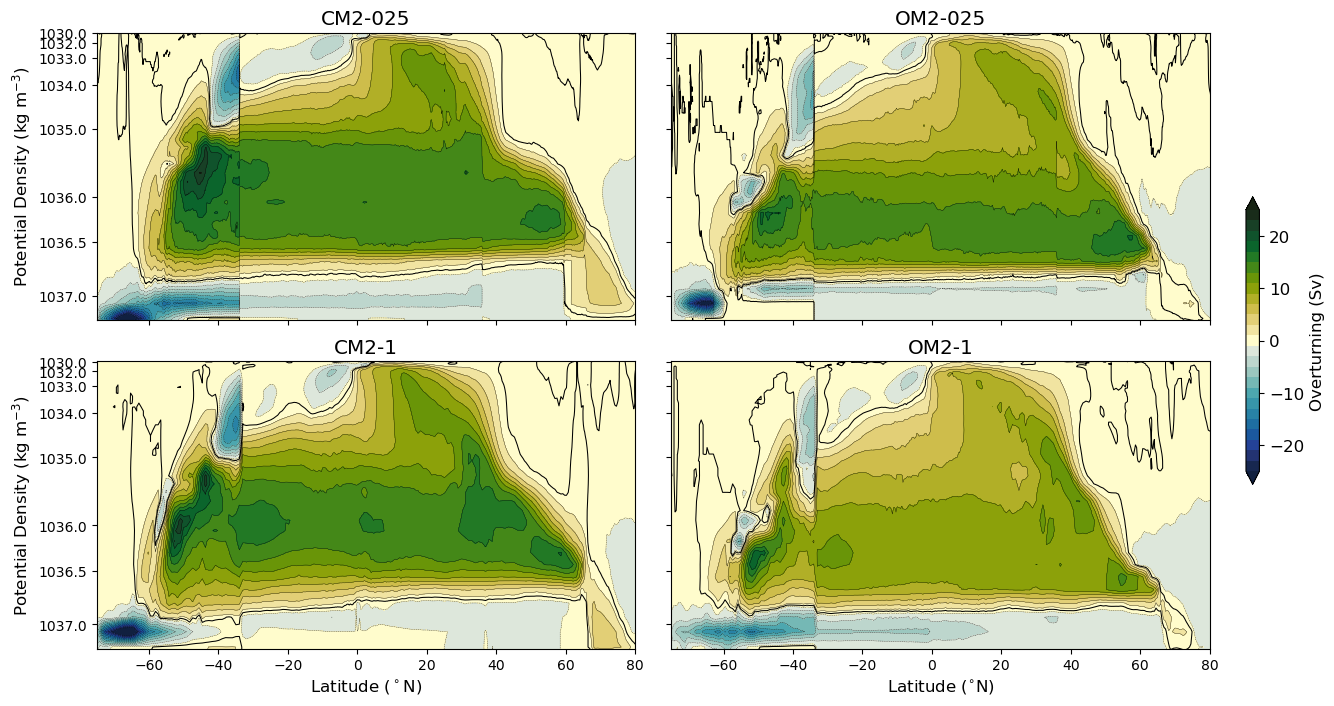

In [33]:
# fig, ax = plt.subplots(2,2, figsize=(10,8))
# ax0 = ax[0,0]
# ax1 = ax[0,1]
# ax2 = ax[1,0]
# ax3 = ax[1,1]

fig = plt.figure(figsize=(15,8))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=1, wspace=0.1)
ax0 = fig.add_subplot(gs[0:4,0])
ax1 = fig.add_subplot(gs[0:4,1])
ax2 = fig.add_subplot(gs[4:,0])
ax3 = fig.add_subplot(gs[4:,1])
                      

# CM2-025
p1 = ax0.contourf(atlantic_psi_CM2_025.grid_yu_ocean,(atlantic_psi_CM2_025.potrho-1028)**scfac, atlantic_psi_CM2_025, cmap=cm.cm.delta, levels=clev, extend='both')
ax0.contour(atlantic_psi_CM2_025.grid_yu_ocean,(atlantic_psi_CM2_025.potrho-1028)**scfac, atlantic_psi_CM2_025, levels=clev, colors='k', linewidths=0.25)
ax0.contour(atlantic_psi_CM2_025.grid_yu_ocean,(atlantic_psi_CM2_025.potrho-1028)**scfac, atlantic_psi_CM2_025, levels=[0.0,], colors='k', linewidths=0.75)
ax0.set_yticks((yticks-1028)**scfac)
ax0.set_yticklabels(yticks, fontsize=ft_size-2)
ax0.set_ylim([0.5**scfac, 9.2**scfac])
ax0.invert_yaxis()
ax0.set_ylabel('Potential Density (kg m$^{-3}$)')
ax0.set_xlim([-75,80])
ax0.set_title('CM2-025')
ax0.tick_params(labelbottom=False)

# OM2-025
p1 = ax1.contourf(atlantic_psi_OM2_025.grid_yu_ocean,(atlantic_psi_OM2_025.potrho-1028)**scfac, atlantic_psi_OM2_025, cmap=cm.cm.delta, levels=clev, extend='both')
ax1.contour(atlantic_psi_OM2_025.grid_yu_ocean,(atlantic_psi_OM2_025.potrho-1028)**scfac, atlantic_psi_OM2_025, levels=clev, colors='k', linewidths=0.25)
ax1.contour(atlantic_psi_OM2_025.grid_yu_ocean,(atlantic_psi_OM2_025.potrho-1028)**scfac, atlantic_psi_OM2_025, levels=[0.0,], colors='k', linewidths=0.75)
ax1.set_yticks((yticks-1028)**scfac)
ax1.set_yticklabels(yticks, fontsize=ft_size-2)
ax1.set_ylim([0.5**scfac, 9.2**scfac])
ax1.invert_yaxis()
ax1.set_xlim([-75,80])
ax1.set_title('OM2-025')
ax1.tick_params(labelbottom=False, labelleft=False)

# CM2-1
p1 = ax2.contourf(atlantic_psi_CM2_1.grid_yu_ocean,(atlantic_psi_CM2_1.potrho-1028)**scfac, atlantic_psi_CM2_1, cmap=cm.cm.delta, levels=clev, extend='both')
ax2.contour(atlantic_psi_CM2_1.grid_yu_ocean,(atlantic_psi_CM2_1.potrho-1028)**scfac, atlantic_psi_CM2_1, levels=clev, colors='k', linewidths=0.25)
ax2.contour(atlantic_psi_CM2_1.grid_yu_ocean,(atlantic_psi_CM2_1.potrho-1028)**scfac, atlantic_psi_CM2_1, levels=[0.0,], colors='k', linewidths=0.75)
ax2.set_yticks((yticks-1028)**scfac)
ax2.set_yticklabels(yticks, fontsize=ft_size-2)
ax2.set_ylim([0.5**scfac, 9.2**scfac])
ax2.invert_yaxis()
ax2.set_xlabel('Latitude ($^\circ$N)')
ax2.set_xlim([-75,80])
ax2.set_title('CM2-1')
ax2.set_ylabel('Potential Density (kg m$^{-3}$)')
ax2.tick_params(axis='both', labelsize=ft_size-2)

# OM2-1
p1 = ax3.contourf(atlantic_psi_OM2_1.grid_yu_ocean,(atlantic_psi_OM2_1.potrho-1028)**scfac, atlantic_psi_OM2_1, cmap=cm.cm.delta, levels=clev, extend='both')
ax3.contour(atlantic_psi_OM2_1.grid_yu_ocean,(atlantic_psi_OM2_1.potrho-1028)**scfac, atlantic_psi_OM2_1, levels=clev, colors='k', linewidths=0.25)
ax3.contour(atlantic_psi_OM2_1.grid_yu_ocean,(atlantic_psi_OM2_1.potrho-1028)**scfac, atlantic_psi_OM2_1, levels=[0.0,], colors='k', linewidths=0.75)
ax3.set_yticks((yticks-1028)**scfac)
ax3.set_yticklabels(yticks, fontsize=ft_size-2)
ax3.set_ylim([0.5**scfac, 9.2**scfac])
ax3.invert_yaxis()
ax3.set_xlabel('Latitude ($^{\circ}$N)')
ax3.set_xlim([-75,80])
ax3.set_title('OM2-1')
ax3.tick_params(axis='both', labelsize=ft_size-2)
plt.tick_params(labelleft=False)

# Plot colorbar
cbar_ax = fig.add_subplot(gs[2:6, 2])
cbar = plt.colorbar(p1, cax=cbar_ax, ticks=np.arange(-20, 25, 10), label='Overturning (Sv)')#, extend='max')
# cax  = plt.axes([0.92, 0.25, 0.01, 0.5])
# cbar = plt.colorbar(p1, cax=cax, orientation='vertical', ticks=np.arange(-25, 30, 5))
# cbar.set_label('Overturning (Sv)')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig6_overturning_psi_atlantic_cz861.png'
    plt.savefig(fig_path + fig_name, dpi=300, bbox_inches='tight', facecolor='white');